In [52]:
import matplotlib.pyplot as plt
from tqdm import tqdm

We first aim to create a function that prints the chain $[a,b]$ generated by $a, b \in \{0,1,\dotsc,10\}$. We will simply use lists to store the chains.

In [53]:
def calculate_chain(a, b, max_length = 100, M = 10):
    chain = [a,b]
    iter_count = 0
    if a == 0 and b == 0:
        return [chain[0]]
    while ((len(chain) == 2 or (chain[-2] != a or chain[-1] != b)) and iter_count <= max_length - 3):
        chain.append((chain[-1] + chain[-2]) % M)
        iter_count += 1

    if chain[-2] == a and chain[-1] == b:
        return chain[:-2]
    return chain

# Known test cases
print(f"a=b=0: {calculate_chain(0,0)}")
print(f"a=6,b=8: {calculate_chain(6,8)}")
print(f"a=8,b=4: {calculate_chain(8,4)}")
print(f"a=1,b=5 (up to 7th term): {calculate_chain(1,5,7)}")

a=b=0: [0]
a=6,b=8: [6, 8, 4, 2]
a=8,b=4: [8, 4, 2, 6]
a=1,b=5 (up to 7th term): [1, 5, 6, 1, 7, 8, 5]


Now we create a function that prints the length of the chain.

In [54]:
def calculate_chain_length(a, b, max_iter = 100, M = 10):
    return len(calculate_chain(a, b, max_iter, 10))

# Known test cases
print(f"a=b=0: {calculate_chain_length(0,0)}")
print(f"a=6,b=8: {calculate_chain_length(6,8)}")
print(f"a=8,b=4: {calculate_chain_length(8,4)}")
print(f"a=1,b=5 (up to 7th term): {calculate_chain_length(1,5,7)}")

a=b=0: 1
a=6,b=8: 4
a=8,b=4: 4
a=1,b=5 (up to 7th term): 7


Now we can answer our question about the legnth of $[1,5]$.

In [55]:
print(f"[1,5] = {calculate_chain(1,5)}")
print(f"The length of [1,5] is {calculate_chain_length(1,5)}.")

[1,5] = [1, 5, 6, 1, 7, 8, 5, 3, 8, 1, 9, 0, 9, 9, 8, 7, 5, 2, 7, 9, 6, 5, 1, 6, 7, 3, 0, 3, 3, 6, 9, 5, 4, 9, 3, 2, 5, 7, 2, 9, 1, 0, 1, 1, 2, 3, 5, 8, 3, 1, 4, 5, 9, 4, 3, 7, 0, 7, 7, 4]
The length of [1,5] is 60.


Chains lengths I have obtained.

In [56]:
print(f"a=b=0: {calculate_chain_length(0,0)}")
print(f"a=0,b=5: {calculate_chain_length(0,5)}")
print(f"a=6,b=8: {calculate_chain_length(6,8)}")
print(f"a=7,b=6: {calculate_chain_length(7,6)}")
print(f"a=0,b=8: {calculate_chain_length(0,8)}")
print(f"a=1,b=2: {calculate_chain_length(1,2)}")

a=b=0: 1
a=0,b=5: 3
a=6,b=8: 4
a=7,b=6: 12
a=0,b=8: 20
a=1,b=2: 60


We now write a function to determine whether two chains are equal

In [57]:
def equal(chain_1, chain_2):
    if len(chain_1) != len(chain_2):
        return False
    N = len(chain_1)
    for k in range(N):
        chain_2_hat = [chain_2[(i-k) % N] for i in range(N)]
        if chain_1 == chain_2_hat:
            return True
    return False

# Known test cases
print(f"[6,8], [8,4]: {equal(calculate_chain(6,8),calculate_chain(8,4))}")
print(f"[0,5], [5,5]: {equal(calculate_chain(0,5),calculate_chain(5,5))}")

[6,8], [8,4]: True
[0,5], [5,5]: True


Finally, we will use this to determine how many unique chains there are in total.

In [58]:
def number_of_unique_chains(M = 10):
    unique_chains = []

    for a in range(0, M):
        for b in range(0, M):
            chain = calculate_chain(a, b)
            
            if not any(equal(chain, unique_chain) for unique_chain in unique_chains):
                unique_chains.append(chain)

    return len(unique_chains)

print(f"Number of unique chains: {number_of_unique_chains()}")

Number of unique chains: 6


As an extension, we will investigate how the total number of chains $T$ changes with the base $M$ that we use (base 10 before).

100%|██████████| 18/18 [01:28<00:00,  4.93s/it]


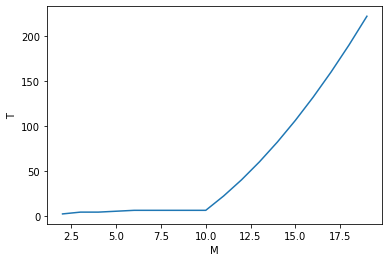

In [59]:
M = range(2,20)
T = [number_of_unique_chains(m) for m in tqdm(M)]

plt.plot(M, T)
plt.xlabel("M")
plt.ylabel("T")
plt.show()

100%|██████████| 9/9 [00:00<00:00, 125.94it/s]


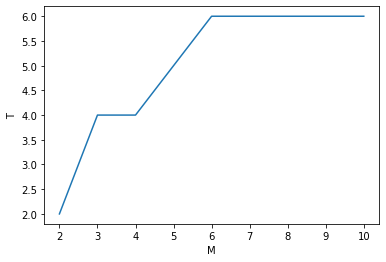

In [63]:
M = range(2,11)
T = [number_of_unique_chains(m) for m in tqdm(M)]

plt.plot(M, T)
plt.xlabel("M")
plt.ylabel("T")
plt.show()